<a href="https://colab.research.google.com/github/diana-rahma/Machine-Learning_Ganjil25_11/blob/main/JS9_Klasifikasi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### TUGAS 2

In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Tampilkan beberapa baris pertama
print(df.head())

# Lihat semua nama kolom
print(df.columns)



     v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN  
Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode label: ham=0, spam=1
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['v1'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['v2'], df['label_num'], test_size=0.2, random_state=42
)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Buat fitur dengan CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Buat dan latih model
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)

# Prediksi
y_pred = nb.predict(X_test_vec)


In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=['ham', 'spam']))


Accuracy: 0.9838565022421525

Confusion Matrix:
 [[959   6]
 [ 12 138]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.99      0.99      0.99       965
        spam       0.96      0.92      0.94       150

    accuracy                           0.98      1115
   macro avg       0.97      0.96      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [ ]:
import pandas as pd

# Load dataset
df = pd.read_csv("spam.csv", encoding='latin-1')

# Ambil kolom penting dan ubah nama
df = df[['v1', 'v2']]
df.columns = ['label', 'message']

print(df.head())


  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode label (ham = 0, spam = 1)
le = LabelEncoder()
df['label_num'] = le.fit_transform(df['label'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    df['message'], df['label_num'], test_size=0.2, random_state=42
)


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Gunakan TF-IDF dengan stopwords bahasa Inggris
tfidf = TfidfVectorizer(stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Buat model dan latih
nb_tfidf = MultinomialNB()
nb_tfidf.fit(X_train_tfidf, y_train)

# Prediksi
y_pred_tfidf = nb_tfidf.predict(X_test_tfidf)


In [ ]:
print("Accuracy (TF-IDF):", accuracy_score(y_test, y_pred_tfidf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_tfidf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_tfidf, target_names=['ham', 'spam']))


Accuracy (TF-IDF): 0.9668161434977578

Confusion Matrix:
 [[965   0]
 [ 37 113]]

Classification Report:
               precision    recall  f1-score   support

         ham       0.96      1.00      0.98       965
        spam       1.00      0.75      0.86       150

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115



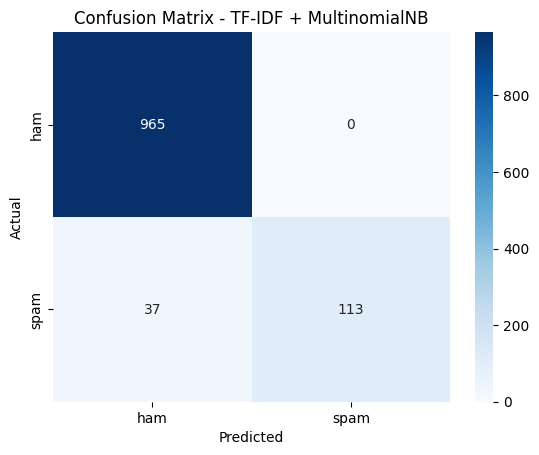

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_tfidf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['ham', 'spam'], yticklabels=['ham', 'spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - TF-IDF + MultinomialNB')
plt.show()
